___
# Atividade: <p> <center> Uso da Distribuição Amostral da Média via resultado do TLC
___
    
## Aula 18

___
<div id="indice"></div>

## Índice

- [Teoria](#teoria)
- [Simulação](#simulacao)
    - [Exercício 1](#ex1)
    - [Visualizando os dados gerados](#visualizando)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)
    - [Exercício 6](#ex6)

___

In [60]:
%matplotlib inline
%reset -f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

<div id="teoria"></div>

# Teoria

## Estatísticas e distribuições amostrais

Uma **estatística** é qualquer função baseada nas observações de uma amostra aleatória. Usamos estatísticas quando, para fins práticos, não é possível ter acesso a toda uma população.

A distribuição de probabilidades de uma estatística é chamada de *distribuição amostral*.


## Média Amostral $\overline{X}$

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Sejam $X_1, X_2, \ldots, X_n$ amostras aleatórias de $X$ de tamanho $n$, então:

$$\overline{X} = \frac{X_1 + X_2 + X_3 + \cdots + X_n}{n}$$

É chamada *Média Amostral*!

Pode-se caracterizar a média amostral com os seguintes valores:

* Média de $\overline{X}$:

$$\mu_{\overline{X}} = E(\overline{X})=\frac{\mu + \mu + \cdots + \mu}{n} = \mu$$

* Variância de $\overline{X}$:


$$\sigma^2_{\overline{X}} = Var(\overline{X})=\frac{\sigma^2 + \sigma^2 + \cdots + \sigma^2}{n^2} = \frac{\sigma^2}{n}$$


<br>

## Teorema  Central do Limite (TLC)

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Dado $X_i$ uma variável aleatória *i.i.d.* (independente e identicamente distribuída) a $X$ com distribuição qualquer, tem-se que:

$$\bar{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^n X_i}{n} \sim N\left(\mu,\frac{\sigma^2}{n}\right),$$

quando $n$ for suficientemente grande.

*Obs:* Em alguns casos específicos, pode-se considerar $X_i$ com distribuições diferentes ou com certa dependência entre elas.

<br> 

**Resultado adicional:**

Se $X_1, X_2, \cdots, X_n$ é uma amostra aleatória de tamanho $n$ extraída de uma população com média $\mu$ e variância $\sigma^2$ e $\overline{X}$ é a distribuição da média amostral, a forma limite da distribuição:

$$Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \sim N\left(0,1\right).$$

É a **distribuição normal padrão**, à medida que $n  \rightarrow \infty$.

___
<div id="simulacao"></div>

# Simulação

Vamos tentar entender a intuição do TLC através de uma simulação.

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma função chamada `amostra_uniforme(n)`, que recebe um número inteiro `n` e que retorna uma lista contendo `n` valores gerados aleatoriamente a partir de uma distribuição uniforme com parâmetros $a=10$, $b=20$. 

Esses `n` valores representam uma amostra aleatória qualquer extraída de $X\sim \text{Uniforme}(10;20)$.

**Dica:** você provavelmente vai utilizar o método `stats.uniform.rvs` (pesquise a documentação).

In [61]:
def amostra_uniforme(n):
    return [stats.uniform.rvs(loc=10, scale=10, size=n)]

___
<div id="visualizando"></div>

## Visualizando os dados gerados

Execute a função `amostra_uniforme(n)` criada no exercício anterior considerando `n=20`.

O gráfico a seguir contem um histograma com os valores da amostra gerados por sua função.

Execute algumas vezes a célula abaixo para perceber que a amostra pode conter valores diferentes.

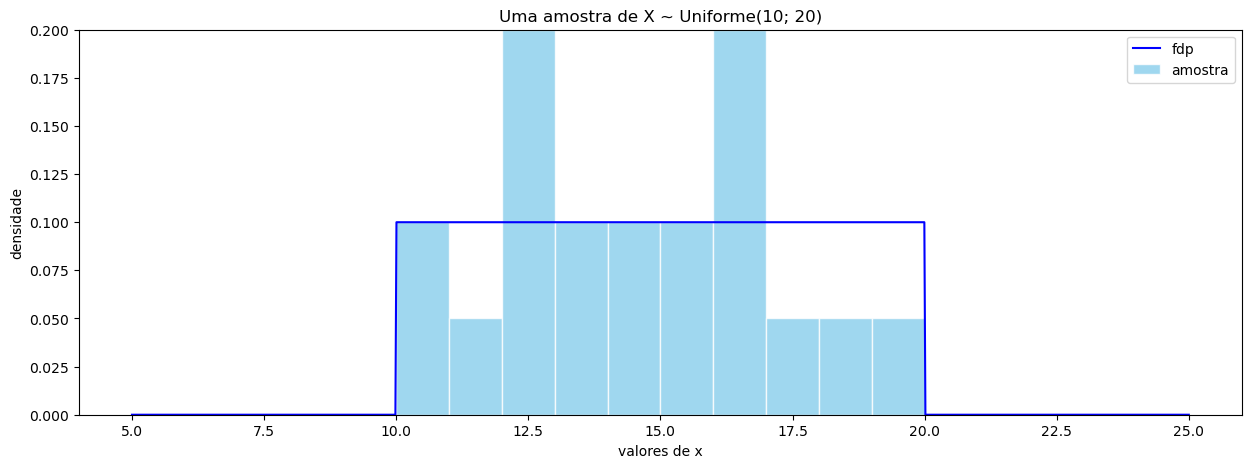

In [62]:
# Gera uma amostra aleatória de tamanho n
#amostra = pd.Series(amostra_uniforme(20))

plt.figure(figsize=(15, 5))

# Para construir o histograma com amplitude 1 nas faixas
faixa = np.arange(10,21,1)
plt.hist(amostra_uniforme(20), bins=faixa, density=True,
         color='skyblue', edgecolor='white', 
         linewidth=1, alpha=0.8)

# Para construir a fdp 
eixo_x = np.linspace(5, 25, 1000)
fx_uniform = stats.uniform.pdf(eixo_x, loc=10, scale=20-10)
plt.plot(eixo_x, fx_uniform, color='blue')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Uma amostra de X ~ Uniforme(10; 20)')
plt.ylim(0,0.2)
plt.legend(('fdp','amostra'))

plt.show()


<div id="ex2"></div>

### EXERCÍCIO 2

Gere um amostra aleatória de tamanho `n=20` utilizando a sua função `amostra_uniforme`.
Calcule a média amostral.

In [63]:
np.mean(amostra_uniforme(n=20))

14.478833644074129

<div id="ex3"></div>

### EXERCÍCIO 3

**a.** Agora repita o [Exercício 2](#ex2) por mil vezes, armazenando as mil médias amostrais em uma lista.

**b.** Plote um histograma com essas médias amostrais obtidas. Utilize `bins=20`, por exemplo.

**c.** Interprete, descritivamente, a distribuição dessas médias amostrais.

<div id="ex4"></div>

### EXERCÍCIO 4

No [Exercício 1](#ex1), a sua função `amostra_uniforme(n)` foi constuída para gerar `n` valores para representar uma amostra aleatória qualquer. Ou seja, de forma teórica $X_1, X_2, X_3, \ldots, X_n$ é uma amostra aleatória de $X\sim \text{Uniforme}(10; 20)$.

No [Exercício 2](#ex2), calculamos uma única média amostral a partir dos valores $X_1, X_2, X_3, \ldots, X_n$. Nos nossos exemplos utilizamos `n=20`.

No [Exercício 3a](#ex3), geramos 1000 amostras de tamanho `n=20` e, com isso, foram calculadas 1000 médias amostrais, $\overline{X}$, todas obtidas de forma independente e da mesma distribuição. 

O que podemos observar no histograma é que essas 1000 médias amostrais se aproximam de uma distribuição simétrica. Seria uma distribuição normal?

Refaça o histograma e adicione a função densidade de probabilidade da distribuição normal considerando como `loc` a média das médias amostrais e como `scale` o desvio padrão da médias amostrais.<br>
Avaliar, descritivamente, se as médias amostrais podem ser modeladas por uma distribuição normal.


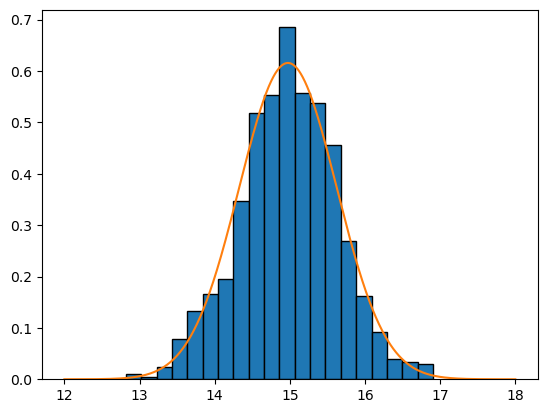

In [65]:
media = np.mean(lista)
dp = np.std(lista)

x = np.linspace(12, 18, 1000)
fx = stats.norm.pdf(x, loc=media, scale=dp)

plt.hist(lista, bins=20, density=True, edgecolor='black')
plt.plot(x, fx)
plt.show()

<div id="ex5"></div>

### EXERCÍCIO 5

Pelo TLC, as médias amostrais $\overline{X}$ devem seguir distribuição normal conforme `n` seja grande. Há estudos que mostram que, com `n>30`, $\overline{X}$ já apresenta boa aproximação de uma normal não importando o formato de $X$.

Ainda, pelo TLC, $\overline{X}$ tem valor médio igual a $\mu$ (que é a média da distribuição original $X$, no caso da uniforme) e variância $\sigma^2/n$. Vamos verificar essa afirmação:

**a.** Calcule a média e variância teóricas da distribuição de $\overline{X}$. Para isso, calcule a média e a variância da $\text{Uniforme}(10; 20)$. Esses dois últimos valores vão representar $\mu$ e $\sigma^2$.

**b.** Calcule a média e variância das 1000 médias amostrais geradas no [Exercício 3](#ex3).

**c.** Compare os resultados e discuta se eles se aproximam do que era esperado pelo TLC.

In [66]:
# ESCREVA SEU CÓDIGO AQUI

<div id="ex6"></div>

### EXERCÍCIO 6

Se os Exercícios de 2 a 5 fossem construídos com um tamanho da amostral menor do que 20, quais seriam as mudanças nos resultados? Assuma, por exemplo, `n=10`. <br>
E se esses Exercícios 2 a 5 fossem construídos com um tamanho amostral maior do que 20? Assuma, por exemplo, `n=50`.


In [67]:
# ESCREVA SEU CÓDIGO AQUI